In [ ]:
# bit.ly/datasci_clps950
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # nice plots
import statsmodels.api as sm # some statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools


from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup, SoupStrainer

In [ ]:
html = requests.get('https://github.com/Sebatron400/CLPS-0950-Final-Project')

dfs = []
for link in BeautifulSoup(html.text, parse_only=SoupStrainer('a')):
    if hasattr(link, 'href') and link['href'].endswith('.csv'):
        url = 'https://github.com'+link['href'].replace('/blob/', '/raw/')
        dfs.append(pd.read_csv(url))
df = pd.concat(dfs)
df.shape

(7830, 40)

In [ ]:
df['col_num'] = 1
for i in range(1,len(df)):
  df['col_num'].values[i] += i


In [ ]:
#make the data frme have the correct season for each player
df['col_num']
df['Year'] = 1978
for j in range(1,len(df)):
  if df.index[j] == 0:
      df['Year'].values[j:] += 1
df = df[ ['Year'] + [ col for col in df.columns if col != 'Year' ] ]


df['MVP?'] = False
df['DPOY?'] = False

df = df[ ['MVP?'] + [ col for col in df.columns if col != 'MVP?' ] ]

#makes a column of booleans if the year is 2022 MVP
# 
# for i in range(0, len(df)):
#   if df['Year'].values[i] == 2022:
#     df['MVP?'].values[i] = True

#drop the mvp csv from original
df = df[df['Year'] != 2022]

#make an mvp data frame that we are goiung to use for comparison later
mvp_url = 'https://raw.githubusercontent.com/Sebatron400/CLPS-0950-Final-Project/master/MVP_winners%20-%20Sheet1.csv'
mvp_df = pd.read_csv(mvp_url)
mvp_df = mvp_df[['Season', 'Player', 'Age', 'Tm']]
mvp_df = mvp_df.drop(labels=range(30, 32), axis=0)
mvp_df = mvp_df.rename(columns={"Season": "MVP_Season", "Player": "MVP_Player","Age":"MVP_Age","Tm":"MVP_Team" })
mvp_df['MVP_Season'] = mvp_df['MVP_Season'].map(lambda x: str(x)[:-3])
mvp_df = mvp_df.drop(labels=range(46, 49), axis=0)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df['Player'] = df['Player'].map(lambda x: str(x).replace('*', ''))

In [ ]:
df = df.rename(columns={"PER\n▼": "PER"})
df.rename(columns = {'Rk':'PER_Rank'}, inplace = True)
#df

In [ ]:
df1 = []

for yr in df.Year.unique():
  sel = df.loc[df.Year == yr].copy()
  sel['TS%_rank'] = sel['TS%'].rank(method='max', ascending = False)
  sel['USG%_rank'] = sel['USG%'].rank(method='max', ascending = False)
  sel['OWS_rank'] = sel['OWS'].rank(method='max', ascending = False)
  sel['DWS_rank'] = sel['DWS'].rank(method='max', ascending = False)
  sel['WS_rank'] = sel['WS'].rank(method='max', ascending = False)
  sel['WS/48_rank'] = sel['WS/48'].rank(method='max', ascending = False)
  sel['OBPM_rank'] = sel['OBPM'].rank(method='max', ascending = False)
  sel['DBPM_rank'] = sel['DBPM'].rank(method='max', ascending = False)
  sel['BPM_rank'] = sel['BPM'].rank(method='max', ascending = False)
  sel['VORP_rank'] = sel['VORP'].rank(method='max', ascending = False)
  #df1.append #add ONLY MVPs from sel to df1: df1 will be 44 rows long
  df1.append(sel)

df2 = pd.concat(df1)

In [ ]:
#set df = df2
df = df2

In [ ]:
mvp_df['MVP_Season'] = pd.to_numeric(mvp_df['MVP_Season'])
mvp_df = mvp_df.sort_values(by=['MVP_Season'], ascending= True)
mvp_df['MVP_Season'] = mvp_df['MVP_Season'] + 1
mvp_df

,MVP_Season,MVP_Player,MVP_Age,MVP_Team
45,1978,Bill Walton,25,POR
44,1979,Moses Malone,23,HOU
43,1980,Kareem Abdul-Jabbar,32,LAL
42,1981,Julius Erving,30,PHI
41,1982,Moses Malone,26,HOU
40,1983,Moses Malone,27,PHI
39,1984,Larry Bird,27,BOS
38,1985,Larry Bird,28,BOS
37,1986,Larry Bird,29,BOS
36,1987,Magic Johnson,27,LAL


In [ ]:
mvp_df.rename(columns = {'Rk':'PER_Rank'}, inplace = True)

In [ ]:
#this updated the df to say true or false for [MVP?] column
df3 = []
for ix,row in mvp_df.iterrows():
  #print(row['MVP_Season'])
  #sel = df.loc[(df.Year == row['MVP_Season']) & (df.Player == row['MVP_Player'])] 
  whole_year = df.loc[df.Year == row['MVP_Season']].copy()
  whole_year.loc[whole_year.Player == row['MVP_Player'], 'MVP?'] = True
  df3.append(whole_year)
  #print(sel)

df3 = pd.concat(df3)

df = df3
#df

In [ ]:
#drop rows that contain this value
df = df[df.PER_Rank != 'More 1983-84 NBA Pages']
df = df[df.PER_Rank != 'More 2001-02 NBA Pages']
#these players doesn't have the stats necessary for our model
df = df[df.Player != 'Armond Hill']
df = df[df.Player != 'Ben McLemore']
df = df[df.Player != 'Charlie Scott']

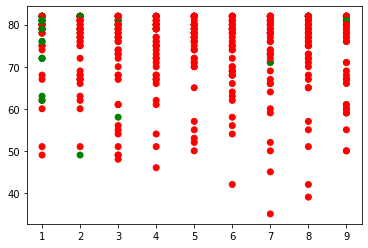

In [ ]:
import matplotlib.pyplot as plt
dfs = df.loc[df.PER_Rank !='More 1983-84 NBA Pages'].copy()
dfs = dfs.loc[dfs.PER_Rank !='More 2001-02 NBA Pages'].copy()
dfs['PER_Rank'] = pd.to_numeric(dfs['PER_Rank'])


dfs = dfs.loc[dfs.PER_Rank < 10]

colors = dfs['MVP?']; colors = ['green' if x else 'red' for x in colors]
x1vals = dfs['PER_Rank']; x2vals = dfs['G']
plt.scatter(x1vals,x2vals,color=colors)

In [ ]:
##############################################
##############################################
##############################################
# The Correct, Final Regressions begin here!!!
##############################################
##############################################
##############################################

In [ ]:
#Top 10 in PER

import matplotlib.pyplot as plt

df['PER_Rank'] = pd.to_numeric(df['PER_Rank'])
top_10_PER_df = df[df['PER_Rank'] < 11]
y = top_10_PER_df['MVP?']
param_columns = {'Combination':[],'Correct':[], 'Guesses':[], 'Percentage':[]}

for j in range(3,9):
  exec(f'top_10_PER_param_tracker_{j} = pd.DataFrame(data = param_columns)')

for j in range(3,9):
  combo_j = list(itertools.combinations(['PER_Rank','TS%_rank',	'USG%_rank',	'OWS_rank',	'DWS_rank',	'WS_rank',	'WS/48_rank',	'OBPM_rank',	
                          'DBPM_rank',	'BPM_rank',	'VORP_rank'],j))
  param_tracker_samp = pd.DataFrame(data = param_columns)
  for i in combo_j:
    model = LogisticRegression(tol = 0.0000001) 
    model.fit(top_10_PER_df[list(i)], y)
    zz = confusion_matrix(y, model.predict(top_10_PER_df[list(i)]))
    correct = (zz[1][1])
    guesses = (confusion_matrix(y, model.predict(top_10_PER_df[list(i)]))[1][1] + confusion_matrix(y, model.predict(top_10_PER_df[list(i)]))[0][1])
    percentage = correct/guesses
    param_tracker_samp.loc[len(param_tracker_samp.index)] = [i, correct, guesses, percentage]

  if j == 3:
    top_10_PER_param_tracker_3 = param_tracker_samp
  elif j == 4:
     top_10_PER_param_tracker_4 = param_tracker_samp
  elif j == 5:
     top_10_PER_param_tracker_5 = param_tracker_samp
  elif j == 6:
     top_10_PER_param_tracker_6 = param_tracker_samp
  elif j == 7:
     top_10_PER_param_tracker_7 = param_tracker_samp
  elif j == 8:
     top_10_PER_param_tracker_8 = param_tracker_samp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

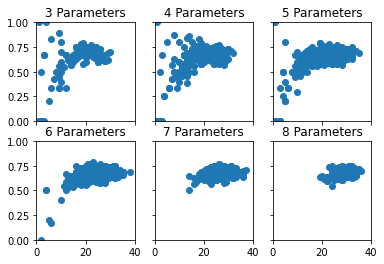

In [ ]:
param_tracker_list = [0, 0, 0, top_10_PER_param_tracker_3, top_10_PER_param_tracker_4, top_10_PER_param_tracker_5, 
                      top_10_PER_param_tracker_6, top_10_PER_param_tracker_7, top_10_PER_param_tracker_8]
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plt.xlim([0, 40])
plt.ylim([0, 1])
i = 3
for ax in axs.ravel():
  ax.scatter(x = param_tracker_list[i]['Guesses'], y = param_tracker_list[i]['Percentage'])
  ax.set_title(str(i) + ' Parameters')
  i += 1

plt.savefig('Top_10_PER_3-8_Params.png')

In [ ]:
#Top 20 in PER

import matplotlib.pyplot as plt

df['PER_Rank'] = pd.to_numeric(df['PER_Rank'])
top_20_PER_df = df[df['PER_Rank'] < 21]
y = top_20_PER_df['MVP?']
param_columns = {'Combination':[],'Correct':[], 'Guesses':[], 'Percentage':[]}

for j in range(3,9):
  exec(f'top_20_PER_param_tracker_{j} = pd.DataFrame(data = param_columns)')

for j in range(3,9):
  combo_j = list(itertools.combinations(['PER_Rank','TS%_rank',	'USG%_rank',	'OWS_rank',	'DWS_rank',	'WS_rank',	'WS/48_rank',	'OBPM_rank',	
                          'DBPM_rank',	'BPM_rank',	'VORP_rank'],j))
  param_tracker_samp = pd.DataFrame(data = param_columns)
  for i in combo_j:
    model = LogisticRegression(tol = 0.0000001) 
    model.fit(top_20_PER_df[list(i)], y)
    zz = confusion_matrix(y, model.predict(top_20_PER_df[list(i)]))
    correct = (zz[1][1])
    guesses = (confusion_matrix(y, model.predict(top_20_PER_df[list(i)]))[1][1] + confusion_matrix(y, model.predict(top_20_PER_df[list(i)]))[0][1])
    percentage = correct/guesses
    param_tracker_samp.loc[len(param_tracker_samp.index)] = [i, correct, guesses, percentage]

  if j == 3:
    top_20_PER_param_tracker_3 = param_tracker_samp
  elif j == 4:
     top_20_PER_param_tracker_4 = param_tracker_samp
  elif j == 5:
     top_20_PER_param_tracker_5 = param_tracker_samp
  elif j == 6:
     top_20_PER_param_tracker_6 = param_tracker_samp
  elif j == 7:
     top_20_PER_param_tracker_7 = param_tracker_samp
  elif j == 8:
     top_20_PER_param_tracker_8 = param_tracker_samp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

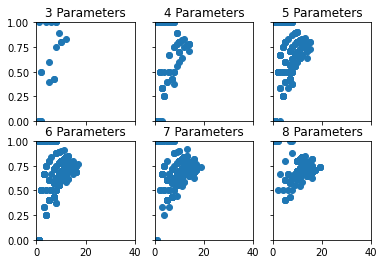

In [ ]:
param_tracker_list = [0, 0, 0, top_20_PER_param_tracker_3, top_20_PER_param_tracker_4, top_20_PER_param_tracker_5, 
                      top_20_PER_param_tracker_6, top_20_PER_param_tracker_7, top_20_PER_param_tracker_8]
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plt.xlim([0, 40])
plt.ylim([0, 1])
i = 3
for ax in axs.ravel():
  ax.scatter(x = param_tracker_list[i]['Guesses'], y = param_tracker_list[i]['Percentage'])
  ax.set_title(str(i) + ' Parameters')
  i += 1

plt.savefig('Top_20_PER_3-8_Params.png')

In [ ]:
#Top 5 in PER

import matplotlib.pyplot as plt

df['PER_Rank'] = pd.to_numeric(df['PER_Rank'])
top_5_PER_df = df[df['PER_Rank'] < 6]
y = top_5_PER_df['MVP?']
param_columns = {'Combination':[],'Correct':[], 'Guesses':[], 'Percentage':[]}

for j in range(3,9):
  exec(f'top_5_PER_param_tracker_{j} = pd.DataFrame(data = param_columns)')

for j in range(3,9):
  combo_j = list(itertools.combinations(['PER_Rank','TS%_rank',	'USG%_rank',	'OWS_rank',	'DWS_rank',	'WS_rank',	'WS/48_rank',	'OBPM_rank',	
                          'DBPM_rank',	'BPM_rank',	'VORP_rank'],j))
  param_tracker_samp = pd.DataFrame(data = param_columns)
  for i in combo_j:
    model = LogisticRegression(tol = 0.0000001) 
    model.fit(top_5_PER_df[list(i)], y)
    zz = confusion_matrix(y, model.predict(top_5_PER_df[list(i)]))
    correct = (zz[1][1])
    guesses = (confusion_matrix(y, model.predict(top_5_PER_df[list(i)]))[1][1] + confusion_matrix(y, model.predict(top_5_PER_df[list(i)]))[0][1])
    percentage = correct/guesses
    param_tracker_samp.loc[len(param_tracker_samp.index)] = [i, correct, guesses, percentage]

  if j == 3:
    top_5_PER_param_tracker_3 = param_tracker_samp
  elif j == 4:
     top_5_PER_param_tracker_4 = param_tracker_samp
  elif j == 5:
     top_5_PER_param_tracker_5 = param_tracker_samp
  elif j == 6:
     top_5_PER_param_tracker_6 = param_tracker_samp
  elif j == 7:
     top_5_PER_param_tracker_7 = param_tracker_samp
  elif j == 8:
     top_5_PER_param_tracker_8 = param_tracker_samp

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

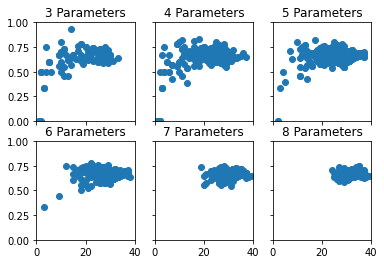

In [ ]:
param_tracker_list = [0, 0, 0, top_5_PER_param_tracker_3, top_5_PER_param_tracker_4, top_5_PER_param_tracker_5, 
                      top_5_PER_param_tracker_6, top_5_PER_param_tracker_7, top_5_PER_param_tracker_8]
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plt.xlim([0, 40])
plt.ylim([0, 1])
i = 3
for ax in axs.ravel():
  ax.scatter(x = param_tracker_list[i]['Guesses'], y = param_tracker_list[i]['Percentage'])
  ax.set_title(str(i) + ' Parameters')
  i += 1

plt.savefig('Top_5_PER_3-8_Params.png')

In [ ]:
#Top 40 in PER

import matplotlib.pyplot as plt

df['PER_Rank'] = pd.to_numeric(df['PER_Rank'])
top_40_PER_df = df[df['PER_Rank'] < 41]
y = top_40_PER_df['MVP?']
param_columns = {'Combination':[],'Correct':[], 'Guesses':[], 'Percentage':[]}

for j in range(3,9):
  exec(f'top_40_PER_param_tracker_{j} = pd.DataFrame(data = param_columns)')

for j in range(3,9):
  combo_j = list(itertools.combinations(['PER_Rank','TS%_rank',	'USG%_rank',	'OWS_rank',	
                                         'DWS_rank',	'WS_rank',	'WS/48_rank',	'OBPM_rank',	
                          'DBPM_rank',	'BPM_rank',	'VORP_rank'],j))
  param_tracker_samp = pd.DataFrame(data = param_columns)
  for i in combo_j:
    model = LogisticRegression(tol = 0.0000001) 
    model.fit(top_40_PER_df[list(i)], y)
    zz = confusion_matrix(y, model.predict(top_40_PER_df[list(i)]))
    correct = (zz[1][1])
    guesses = (confusion_matrix(y, model.predict(top_40_PER_df[list(i)]))[1][1] + 
               confusion_matrix(y, model.predict(top_40_PER_df[list(i)]))[0][1])
    percentage = correct/guesses
    param_tracker_samp.loc[len(param_tracker_samp.index)] = [i, correct, guesses, percentage]

  if j == 3:
    top_40_PER_param_tracker_3 = param_tracker_samp
  elif j == 4:
     top_40_PER_param_tracker_4 = param_tracker_samp
  elif j == 5:
     top_40_PER_param_tracker_5 = param_tracker_samp
  elif j == 6:
     top_40_PER_param_tracker_6 = param_tracker_samp
  elif j == 7:
     top_40_PER_param_tracker_7 = param_tracker_samp
  elif j == 8:
     top_40_PER_param_tracker_8 = param_tracker_samp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

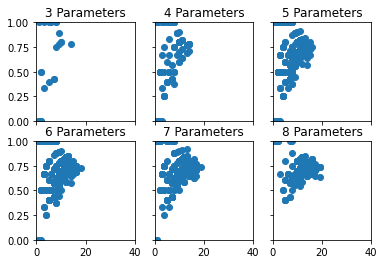

In [ ]:
param_tracker_list = [0, 0, 0, top_40_PER_param_tracker_3, top_40_PER_param_tracker_4, top_40_PER_param_tracker_5, 
                      top_40_PER_param_tracker_6, top_40_PER_param_tracker_7, top_40_PER_param_tracker_8]
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plt.xlim([0, 40])
plt.ylim([0, 1])
i = 3
for ax in axs.ravel():
  ax.scatter(x = param_tracker_list[i]['Guesses'], y = param_tracker_list[i]['Percentage'])
  ax.set_title(str(i) + ' Parameters')
  i += 1

plt.savefig('Top_40_PER_3-8_Params.png')

In [ ]:
mvps = df[df['MVP?']==True]
mvps_rankings = mvps[['Year', 'Player', 'PER_Rank','TS%_rank',	'USG%_rank',	'OWS_rank',	
                                         'DWS_rank',	'WS_rank',	'WS/48_rank',	'OBPM_rank',	
                          'DBPM_rank',	'BPM_rank',	'VORP_rank']]
mvps_rankings

,Year,Player,PER_Rank,TS%_rank,USG%_rank,OWS_rank,DWS_rank,WS_rank,WS/48_rank,OBPM_rank,DBPM_rank,BPM_rank,VORP_rank
2,1978,Bill Walton,3,30.0,32.0,43.0,5.0,19.0,3.0,7.0,1.0,2.0,4.0
2,1979,Moses Malone,3,7.0,38.0,1.0,23.0,2.0,3.0,4.0,145.0,19.0,5.0
1,1980,Kareem Abdul-Jabbar,2,3.0,31.0,2.0,4.0,1.0,1.0,5.0,5.0,2.0,1.0
2,1981,Julius Erving,3,34.0,8.0,7.0,2.0,2.0,1.0,2.0,9.0,1.0,1.0
0,1982,Moses Malone,1,25.0,2.0,2.0,28.0,1.0,2.0,1.0,146.0,7.0,4.0
0,1983,Moses Malone,1,27.0,14.0,3.0,2.0,1.0,1.0,9.0,87.0,12.0,10.0
1,1984,Larry Bird,2,65.0,14.0,6.0,1.0,2.0,3.0,2.0,8.0,1.0,1.0
0,1985,Larry Bird,1,26.0,10.0,1.0,2.0,1.0,1.0,1.0,10.0,1.0,1.0
0,1986,Larry Bird,1,34.0,10.0,2.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0
1,1987,Magic Johnson,2,17.0,18.0,1.0,22.0,2.0,1.0,2.0,20.0,3.0,3.0


In [ ]:
lead_40_3_params = top_40_PER_param_tracker_3[top_40_PER_param_tracker_3.Guesses > 0]
lead_40_4_params = top_40_PER_param_tracker_4[top_40_PER_param_tracker_4.Guesses > 0]
lead_40_5_params = top_40_PER_param_tracker_5[top_40_PER_param_tracker_5.Guesses > 0]


lead_40_3_params = lead_40_3_params.sort_values(by=['Correct'], ascending=False)
lead_40_4_params = lead_40_4_params.sort_values(by=['Correct'], ascending=False)
lead_40_5_params = lead_40_5_params.sort_values(by=['Correct'], ascending=False)

In [ ]:
Overview_40 = pd.DataFrame(data = param_columns)
Overview_40 = lead_40_3_params[0:3]
Overview_40 = Overview_40.append(lead_40_4_params[0:3])
Overview_40 = Overview_40.append(lead_40_5_params[0:3])

Overview_40

,Combination,Correct,Guesses,Percentage
135,"(DWS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
111,"(OWS_rank, DWS_rank, OBPM_rank)",8.0,9.0,0.888889
140,"(DWS_rank, OBPM_rank, BPM_rank)",8.0,8.0,1.000000
295,"(DWS_rank, WS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
90,"(PER_Rank, DWS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
265,"(OWS_rank, DWS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
312,"(TS%_rank, DWS_rank, WS/48_rank, OBPM_rank, BP...",12.0,15.0,0.800000
453,"(DWS_rank, WS/48_rank, OBPM_rank, BPM_rank, VO...",12.0,16.0,0.750000
236,"(TS%_rank, USG%_rank, DWS_rank, WS/48_rank, OB...",11.0,15.0,0.733333


In [ ]:
lead_10_3_params = top_10_PER_param_tracker_3[top_10_PER_param_tracker_3.Guesses > 0]
lead_10_4_params = top_10_PER_param_tracker_4[top_10_PER_param_tracker_4.Guesses > 0]
lead_10_5_params = top_10_PER_param_tracker_5[top_10_PER_param_tracker_5.Guesses > 0]


lead_10_3_params = lead_10_3_params.sort_values(by=['Correct'], ascending=False)
lead_10_4_params = lead_10_4_params.sort_values(by=['Correct'], ascending=False)
lead_10_5_params = lead_10_5_params.sort_values(by=['Correct'], ascending=False)

In [ ]:
Overview_10 = pd.DataFrame(data = param_columns)
Overview_10 = lead_10_3_params[0:3]
Overview_10 = Overview_10.append(lead_10_4_params[0:3])
Overview_10 = Overview_10.append(lead_10_5_params[0:3])

Overview_10

,Combination,Correct,Guesses,Percentage
29,"(PER_Rank, DWS_rank, VORP_rank)",21.0,30.0,0.700000
160,"(WS/48_rank, BPM_rank, VORP_rank)",20.0,29.0,0.689655
138,"(DWS_rank, WS/48_rank, VORP_rank)",19.0,26.0,0.730769
98,"(PER_Rank, DWS_rank, DBPM_rank, VORP_rank)",22.0,31.0,0.709677
48,"(PER_Rank, USG%_rank, DWS_rank, VORP_rank)",22.0,30.0,0.733333
99,"(PER_Rank, DWS_rank, BPM_rank, VORP_rank)",22.0,30.0,0.733333
189,"(PER_Rank, DWS_rank, WS/48_rank, DBPM_rank, VO...",24.0,35.0,0.685714
190,"(PER_Rank, DWS_rank, WS/48_rank, BPM_rank, VOR...",24.0,32.0,0.750000
445,"(DWS_rank, WS_rank, WS/48_rank, DBPM_rank, VOR...",24.0,34.0,0.705882


In [ ]:
lead_20_3_params = top_20_PER_param_tracker_3[top_20_PER_param_tracker_3.Guesses > 0]
lead_20_4_params = top_20_PER_param_tracker_4[top_20_PER_param_tracker_4.Guesses > 0]
lead_20_5_params = top_20_PER_param_tracker_5[top_20_PER_param_tracker_5.Guesses > 0]

lead_20_3_params = lead_20_3_params.sort_values(by=['Correct'], ascending=False)
lead_20_4_params = lead_20_4_params.sort_values(by=['Correct'], ascending=False)
lead_20_5_params = lead_20_5_params.sort_values(by=['Correct'], ascending=False)

In [ ]:
Overview_20 = pd.DataFrame(data = param_columns)
Overview_20 = lead_20_3_params[0:3]
Overview_20 = Overview_20.append(lead_20_4_params[0:3])
Overview_20 = Overview_20.append(lead_20_5_params[0:3])

Overview_20

,Combination,Correct,Guesses,Percentage
135,"(DWS_rank, WS/48_rank, OBPM_rank)",10.0,12.0,0.833333
111,"(OWS_rank, DWS_rank, OBPM_rank)",8.0,9.0,0.888889
140,"(DWS_rank, OBPM_rank, BPM_rank)",8.0,8.0,1.000000
265,"(OWS_rank, DWS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
295,"(DWS_rank, WS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
90,"(PER_Rank, DWS_rank, WS/48_rank, OBPM_rank)",11.0,14.0,0.785714
312,"(TS%_rank, DWS_rank, WS/48_rank, OBPM_rank, BP...",12.0,15.0,0.800000
453,"(DWS_rank, WS/48_rank, OBPM_rank, BPM_rank, VO...",12.0,15.0,0.800000
175,"(PER_Rank, DWS_rank, WS_rank, WS/48_rank, OBPM...",11.0,14.0,0.785714


In [ ]:
lead_5_3_params = top_5_PER_param_tracker_3[top_5_PER_param_tracker_3.Guesses > 0]
lead_5_4_params = top_5_PER_param_tracker_4[top_5_PER_param_tracker_4.Guesses > 0]
lead_5_5_params = top_5_PER_param_tracker_5[top_5_PER_param_tracker_5.Guesses > 0]

lead_5_3_params = lead_5_3_params.sort_values(by=['Correct'], ascending=False)
lead_5_4_params = lead_5_4_params.sort_values(by=['Correct'], ascending=False)
lead_5_5_params = lead_5_5_params.sort_values(by=['Correct'], ascending=False)


In [ ]:
Overview_5 = pd.DataFrame(data = param_columns)
Overview_5 = lead_5_3_params[0:3]
Overview_5 = Overview_5.append(lead_5_4_params[0:3])
Overview_5 = Overview_5.append(lead_5_5_params[0:3])

Overview_5

,Combination,Correct,Guesses,Percentage
138,"(DWS_rank, WS/48_rank, VORP_rank)",21.0,29.0,0.724138
29,"(PER_Rank, DWS_rank, VORP_rank)",21.0,33.0,0.636364
65,"(TS%_rank, DWS_rank, VORP_rank)",21.0,28.0,0.750000
309,"(DWS_rank, WS/48_rank, DBPM_rank, VORP_rank)",25.0,36.0,0.694444
99,"(PER_Rank, DWS_rank, BPM_rank, VORP_rank)",24.0,37.0,0.648649
98,"(PER_Rank, DWS_rank, DBPM_rank, VORP_rank)",23.0,35.0,0.657143
385,"(USG%_rank, DWS_rank, WS/48_rank, DBPM_rank, V...",26.0,37.0,0.702703
420,"(OWS_rank, DWS_rank, WS/48_rank, DBPM_rank, VO...",25.0,36.0,0.694444
445,"(DWS_rank, WS_rank, WS/48_rank, DBPM_rank, VOR...",25.0,37.0,0.675676
